# (Dataset Exploration Title)
## by (your name here)

## Preliminary Wrangling

> Briefly introduce your dataset here.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# One time step
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# for year in np.arange(2014, 2017):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.zip"
#         with ZipFile(file_name, 'r') as zip:
#             zip.extractall()
#             print('Done!')

# # trip = pd.read_csv("2017-fordgobike-tripdata.csv")


In [3]:
# trip_all = pd.DataFrame()

# for year in np.arange(2014, 2015):
#     for month in np.arange(1, 13):
#         m_str = str(month)
#         if len(m_str)<2:
#             m_str = "0"+m_str
#         file_name = str(year)+m_str+"-citibike-tripdata.csv"
# #         print(file_name)
#         if trip_all.empty:
#             trip_all = pd.read_csv(file_name)
#         else:
#             new_df = pd.read_csv(file_name)
# #             trip_all = trip_all.append(new_df, ignore_index=True)
#             print("Before "+file_name+" trip_all.shape: ",trip_all.shape[0], "new_df.shape: ",new_df.shape[0])
#             trip_all = pd.concat([trip_all, new_df], ignore_index=True)
#             print("After "+file_name+" trip_all.shape: ",trip_all.shape[0])
# #         df.head()
#     print("Complete")
    

In [4]:
# samples = np.random.choice(trip_all.shape[0], 10000, replace = False)
# trip_samp = trip_all.loc[samples,:]
# trip_samp.to_csv("trip_sample_10000.csv", index=False)

In [5]:
trip = pd.read_csv("trip_sample_10000.csv")

In [6]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null object
stoptime                   10000 non-null object
start station id           10000 non-null int64
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null int64
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null int64
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.1+ MB


In [7]:
# date type columns to correct format
for d_col in ['starttime', 'stoptime']:
    trip[d_col] = pd.to_datetime(trip[d_col])

In [8]:
trip.sort_values(by='starttime', inplace=True)

In [9]:
# int colums to str type
for int_col in ['start station id', 'end station id', 'bikeid']:
    trip[int_col] = pd.Categorical(trip[int_col], categories = trip[int_col].unique(), ordered=False)

In [10]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 15 columns):
tripduration               10000 non-null int64
starttime                  10000 non-null datetime64[ns]
stoptime                   10000 non-null datetime64[ns]
start station id           10000 non-null category
start station name         10000 non-null object
start station latitude     10000 non-null float64
start station longitude    10000 non-null float64
end station id             10000 non-null category
end station name           10000 non-null object
end station latitude       10000 non-null float64
end station longitude      10000 non-null float64
bikeid                     10000 non-null category
usertype                   10000 non-null object
birth year                 9708 non-null object
gender                     10000 non-null int64
dtypes: category(3), datetime64[ns](2), float64(4), int64(2), object(4)
memory usage: 1.3+ MB


In [11]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [12]:
trip = trip[['tripduration', 'starttime', 'stoptime', 'start station id'
       ,'end station id', 'bikeid', 'usertype','birth year', 'gender','start station name', 'end station name']]

In [13]:
# time_of_day_values = ["Early morning(0<=6)","Morning(6<=12)","Afternoon(12<=18)","Night(18<=24)"]

# def get_time_of_day(x):
#     duration = ""
#     if x.hour < 6:
#         duration = time_of_day_values[0]
#     elif x.hour < 12:
#         duration = time_of_day_values[1]
#     elif x.hour < 18:
#         duration = time_of_day_values[2]
#     elif x.hour < 24:
#         duration = time_of_day_values[3]
#     return duration

def get_time_of_day(x):
    return x.hour

# x.isoweekday()
trip['time_of_day'] = trip['starttime'].apply(get_time_of_day)
trip['day_of_week'] = trip['starttime'].dt.day_name()

trip['month_of_year'] = trip['starttime'].dt.month_name()
trip['start_date'] = trip['starttime'].dt.date
# trip['start_time_date'] = trip['start_time'].dt.strftime('%y' + '-' + '%m')

# .apply(lambda x: x.month)


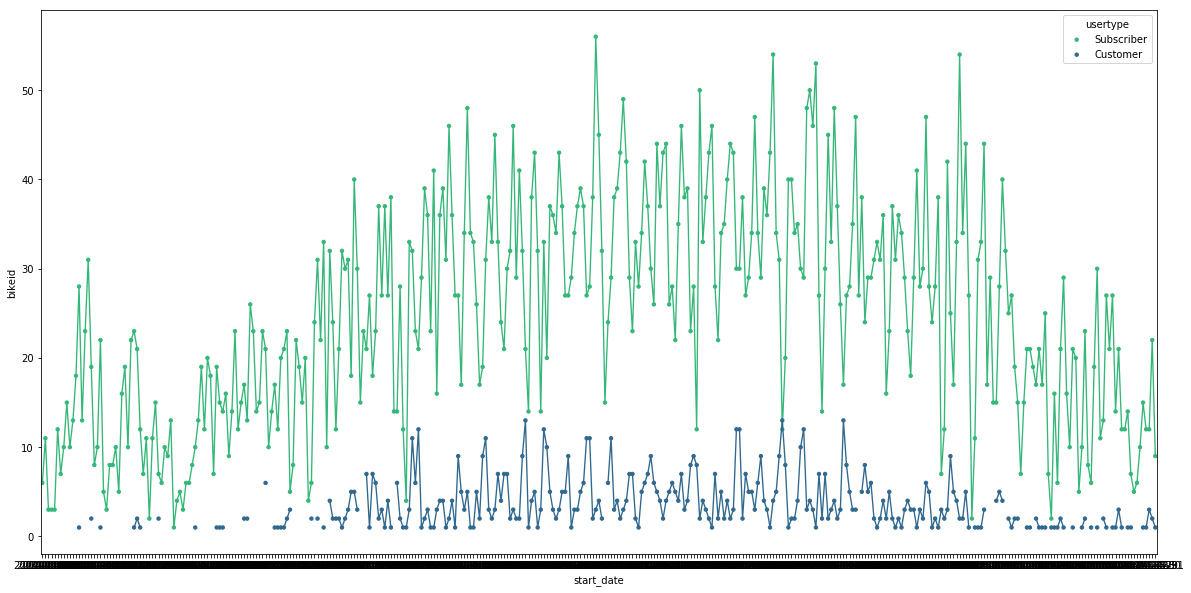

In [14]:
# Date Vs total rides count

# trip.groupby('start_date').agg({'bikeid':'count'}).plot(style='-', legend=False, figsize=(17,9))
plt.figure(figsize=[20,10])
date_usertype_df= trip.groupby(['start_date','usertype']).agg({'bikeid':'count'}).reset_index()

ax = sb.pointplot(x='start_date', y='bikeid', hue='usertype', palette='viridis_r', scale=.5, data=date_usertype_df)
# .plot(kind='bar', color='blue',figsize=(20,10))

# .query('usertype == "Subscriber"')
# trip.query('usertype == "Customer"').groupby('start_date').agg({'bikeid':'count'}).plot(kind='line', color='green')

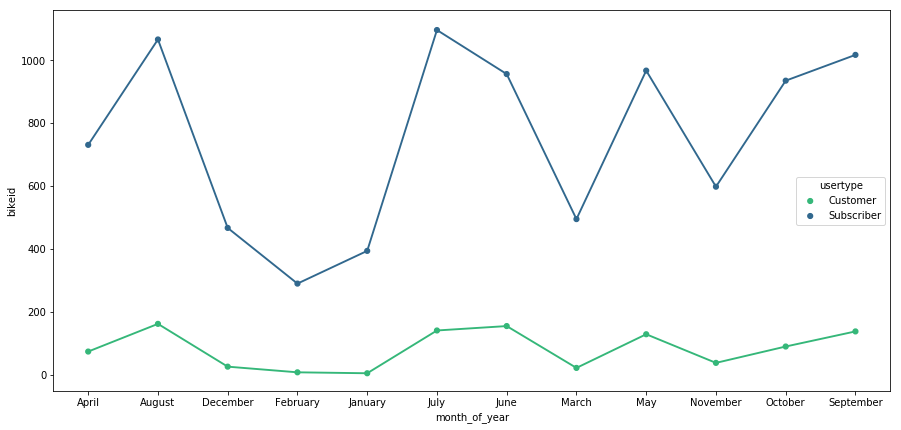

In [15]:
# Month Vs total rides count
plt.figure(figsize=[15,7])
month_usertype_df= trip.groupby(['month_of_year','usertype']).agg({'bikeid':'count'}).reset_index()

ax = sb.pointplot(x='month_of_year', y='bikeid', hue='usertype', palette='viridis_r', scale=.7, data=month_usertype_df)

In [16]:
# date_usertype_df
# sp = np.random.choice(trip.shape[0], 5, replace = False)
# trip.loc[sp,:].groupby('start_date').agg({'bikeid':'count'})

In [17]:
# trip.loc[sp,:]

In [18]:
# trip.query('start_date == "2014-01-01"')

In [ ]:
# trip.bikeid.nunique()

In [ ]:
trip.shape[0]

10000

In [ ]:
# heatmap_df = trip.groupby(['start station name','end station name']).agg({'bikeid':'count'}).reset_index()
# heatmap_df
# plt.figure(figsize=[20,10])
# pivot_heatmap_df = heatmap_df.pivot_table(index='start station name', columns='end station name', values='bikeid')
# pivot_heatmap_df
# sb.heatmap(pivot_heatmap_df, cmap='viridis_r', fmt='g')

In [ ]:
# trip['time_of_day'] = pd.Categorical(trip['time_of_day'], categories=time_of_day_values, ordered=True)

In [ ]:
trip['day_of_week'] = pd.Categorical(trip['day_of_week'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

In [ ]:
trip['month_of_year'] = pd.Categorical(trip['month_of_year'], categories=['January','February','March','April','May','June', 'July','August','September','October', 'November','December'], ordered=True)

In [ ]:
trip['tripduration_min'] = trip.tripduration/60

In [ ]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 218 to 741
Data columns (total 16 columns):
tripduration          10000 non-null int64
starttime             10000 non-null datetime64[ns]
stoptime              10000 non-null datetime64[ns]
start station id      10000 non-null category
end station id        10000 non-null category
bikeid                10000 non-null category
usertype              10000 non-null object
birth year            9708 non-null object
gender                10000 non-null int64
start station name    10000 non-null object
end station name      10000 non-null object
time_of_day           10000 non-null int64
day_of_week           10000 non-null category
month_of_year         10000 non-null category
start_date            10000 non-null object
tripduration_min      10000 non-null float64
dtypes: category(5), datetime64[ns](2), float64(1), int64(3), object(5)
memory usage: 1.2+ MB


### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [ ]:
trip.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'end station id', 'bikeid', 'usertype', 'birth year', 'gender',
       'start station name', 'end station name', 'time_of_day', 'day_of_week',
       'month_of_year', 'start_date', 'tripduration_min'],
      dtype='object')

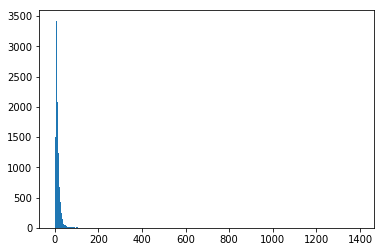

In [ ]:
bins = np.arange(0, 1400, 5)

plt.hist(data=trip, x='tripduration_min', bins=bins);

most of the data is set to the far left of their axes, suggesting some strong outliers on the right.It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.

In [ ]:
# high_outliers = ((trip['tripduration_min'] > 100))
# print(high_outliers.sum())
# print(trip.loc[high_outliers,:])
# high_outliers
# (trip.loc[high_outliers,:])[['starttime', 'stoptime','tripduration_min']]
duration_df = trip.query('tripduration_min > 100')[['starttime', 'stoptime','tripduration_min','tripduration']]
# pd.to_numeric()
duration_df['stoptime'].sub(duration_df['starttime'])/ np.timedelta64(1, 'm') - duration_df['tripduration_min']

8498    0.0
8733    0.0
8773    0.0
1048    0.0
7687    0.0
9724    0.0
3894    0.0
7888    0.0
9074    0.0
6467    0.0
5892    0.0
5094    0.0
1821    0.0
6974    0.0
1684    0.0
1116    0.0
4251    0.0
7058    0.0
1108    0.0
6793    0.0
6755    0.0
4818    0.0
2955    0.0
4472    0.0
3763    0.0
7950    0.0
3172    0.0
1573    0.0
3730    0.0
8906    0.0
6684    0.0
5538    0.0
9655    0.0
2044    0.0
2858    0.0
8470    0.0
1787    0.0
2145    0.0
6724    0.0
4383    0.0
3685    0.0
3423    0.0
2200    0.0
5703    0.0
6281    0.0
dtype: float64

All the high outliers appear to be valid points.

In [ ]:
# remove outlier values.
trip = trip.query('tripduration_min < 100')
trip.shape[0]

9955

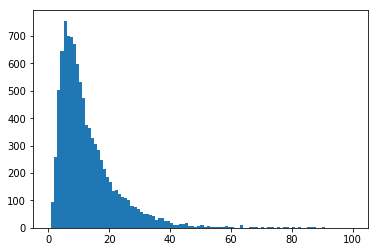

In [ ]:
bin_size = 1
bins = np.arange(0, 100+bin_size, bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins);

Text(0.5, 0, 'trip duration (min)')

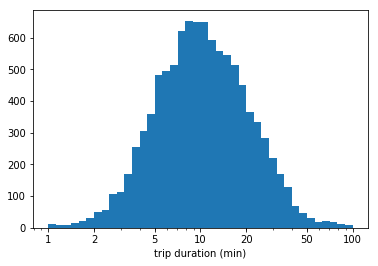

In [ ]:
log_bin_size = 0.05
bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
plt.hist(data=trip, x='tripduration_min', bins=bins)
plt.xscale('log')
x_ticks = [1, 2, 5,10,20,50,100]
plt.xticks(x_ticks, x_ticks)
plt.xlabel('trip duration (min)')

tripduration_min has a long-tailed distribution, with 45 trips having trip duration more than 100 mins and rest of the 9955 trips having trip duration less than 100 mins. When plotted on a log-scale, the price distribution looks unimodal, with peak between 5 and 20.

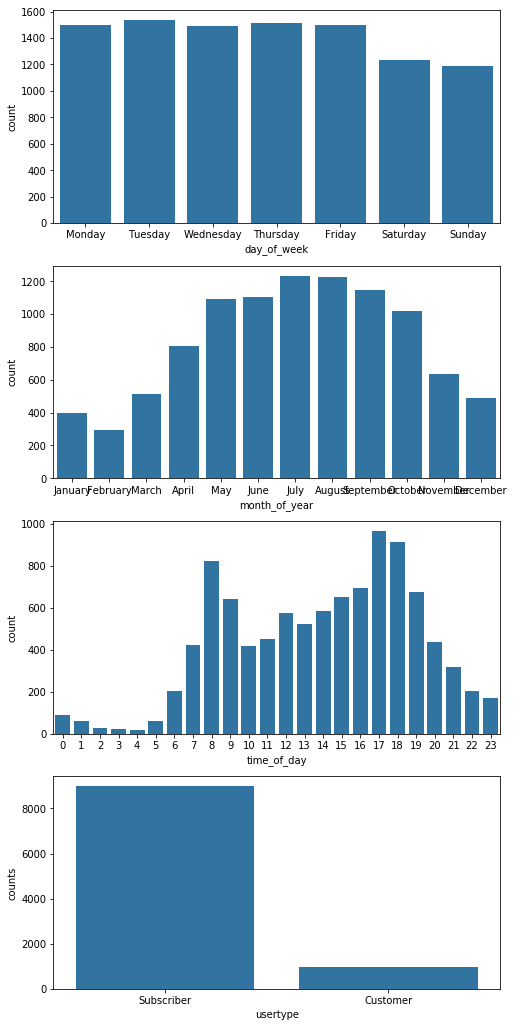

In [ ]:
fig, ax = plt.subplots(nrows=4, figsize = [8,18])
base_color = sb.color_palette()[0]

cat_var = ['day_of_week', 'month_of_year','time_of_day','usertype']
for n in np.arange(0, 4):
    col = cat_var[n]
    sb.countplot(data=trip, x=col, color=sb.color_palette()[0], ax = ax[n]);
    plt.xlabel(col)
    plt.ylabel('counts')
#     plt.xticks(rotation=45)
    

Days of week - Most of the trips are made in weekdays(Monday-Friday), this can be because of these days being working days.Though there is not a very huge difference between weekdays abd weekends.

Month of year - Months from May to October have the most rides, with Feburary being the lowest.This can be attributed to temperature being lowest in Februray.

Time of Day -  The plot is bimodal, with peaks between 8 - 10 hours and 15 - 20 hours.

User type - Subcriber user type have ~9000 rides , Customer has only ~1000 rides

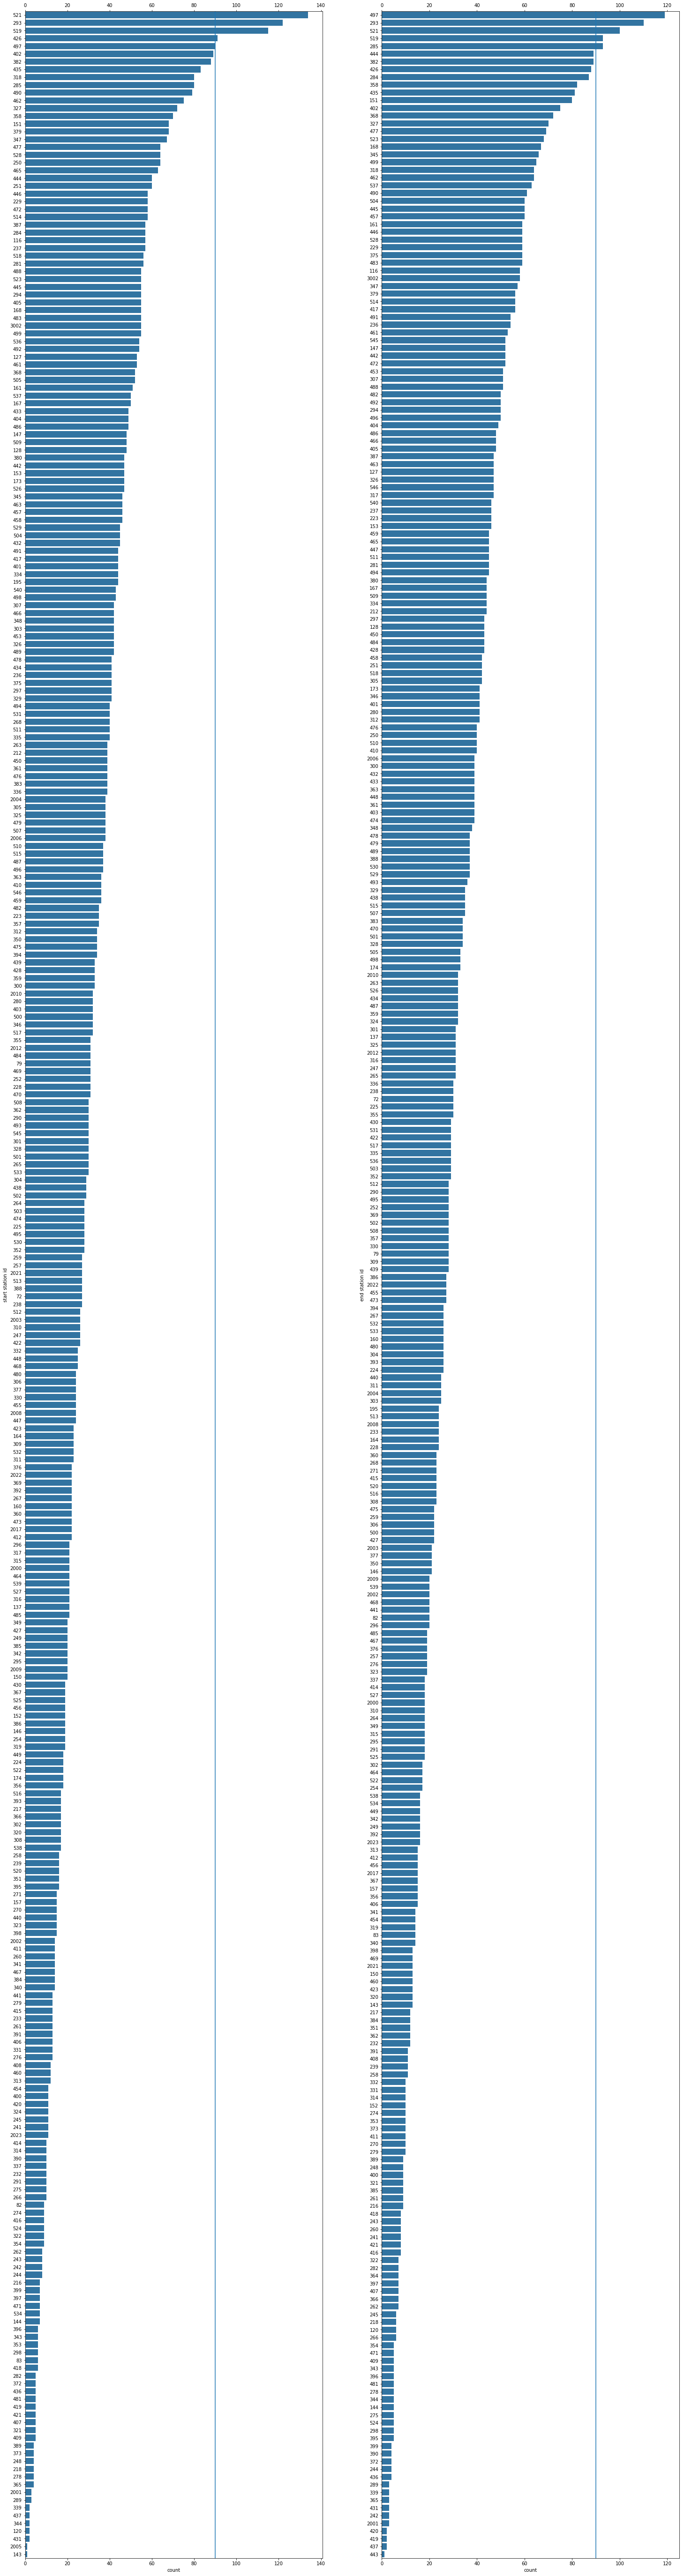

In [ ]:
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station id'
start_station_order = trip['start station id'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=start_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.subplot(1,2,2)
col = 'end station id'
end_station_order = trip['end station id'].value_counts().index
sb.countplot(data=trip, y=col, color=sb.color_palette()[0], order=end_station_order);
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

In [60]:
trip.sort_values("start station id").groupby("start station id").agg({'bikeid':'count'})#value_counts()

C:\Users\manju\Anaconda3_4Feb19\lib\site-packages\pandas\core\groupby\groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


KeyError: 'bikeid'

In [61]:
trip.columns

Index(['start station id', 'end station id', 'usertype', 'time_of_day',
       'day_of_week', 'month_of_year', 'tripduration_min',
       'start station name', 'end station name', 'starttime'],
      dtype='object')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# Data
states = ["AK", "TX", "CA", "MT", "NM", "AZ", "NV", "CO", "OR", "WY", "MI",
          "MN", "UT", "ID", "KS", "NE", "SD", "WA", "ND", "OK"]
staff = np.array([20, 30, 40, 10, 15, 35, 18, 25, 22, 7, 12, 22, 3, 4, 5, 8,
                  14, 28, 24, 32])
sales = staff * (20 + 10 * np.random.random(staff.size))

# Sort by number of sales staff
idx = staff.argsort()
states, staff, sales = [np.take(x, idx) for x in [states, staff, sales]]

y = np.arange(sales.size)

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, staff, align='center', color='gray', zorder=10)
axes[0].set(title='Number of sales staff')
axes[1].barh(y, sales, align='center', color='gray', zorder=10)
axes[1].set(title='Sales (x $1000)')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=states)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

'start station id' - 521,  293,  519,  426,  497 and 'end station id'  497,  293,  521,  285,  519  have the highest number of trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [ ]:
trip = trip[['start station id','end station id','usertype','time_of_day', 'day_of_week', 'month_of_year', 'tripduration_min','start station name', 'end station name','starttime']]

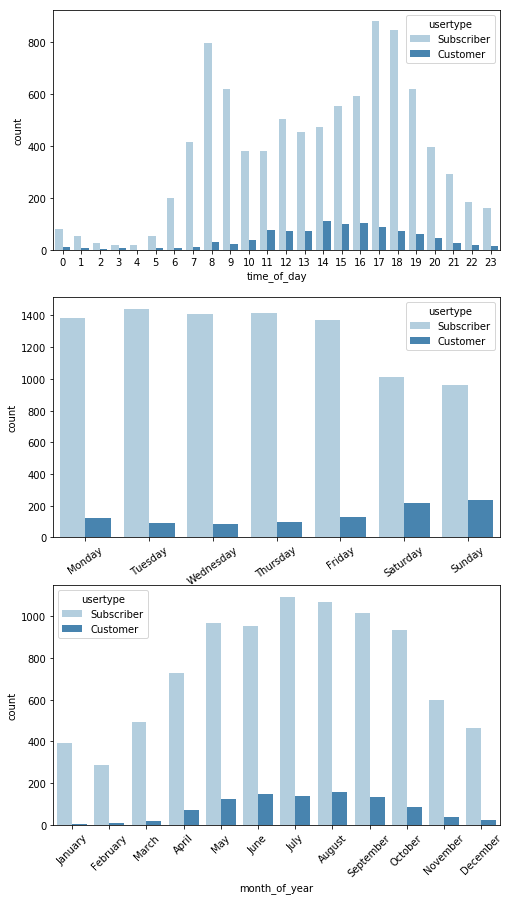

In [ ]:
plt.figure(figsize = [8, 15])

# subplot 1: color vs cut
plt.subplot(3, 1, 1)
sb.countplot(data = trip, x = 'time_of_day', hue = 'usertype', palette = 'Blues')

# subplot 2: clarity vs. cut
ax = plt.subplot(3, 1, 2)
sb.countplot(data = trip, x = 'day_of_week', hue = 'usertype', palette = 'Blues')
# ax.legend(ncol = 1) # re-arrange legend to reduce overlapping
plt.xticks(rotation=35)

# subplot 3: clarity vs. color, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = trip, x = 'month_of_year', hue = 'usertype', palette = 'Blues')
# ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=45)

plt.show()

Time of Day- plot for rides by subscriber usertype is bimodalwith high counts, however plot for rides by customer usertype is unimodal.

Day of week - rides by Subscribers reduce on weekends(Saturday and Sunday) , however rides for Customer increases on weekends(Saturday and Sunday) but still rides by Subsciber on weekends is greater than by Customer.

Month of year - plot for number of rides by both - subscriber and customer, are unimodal with most of the rides between May and October

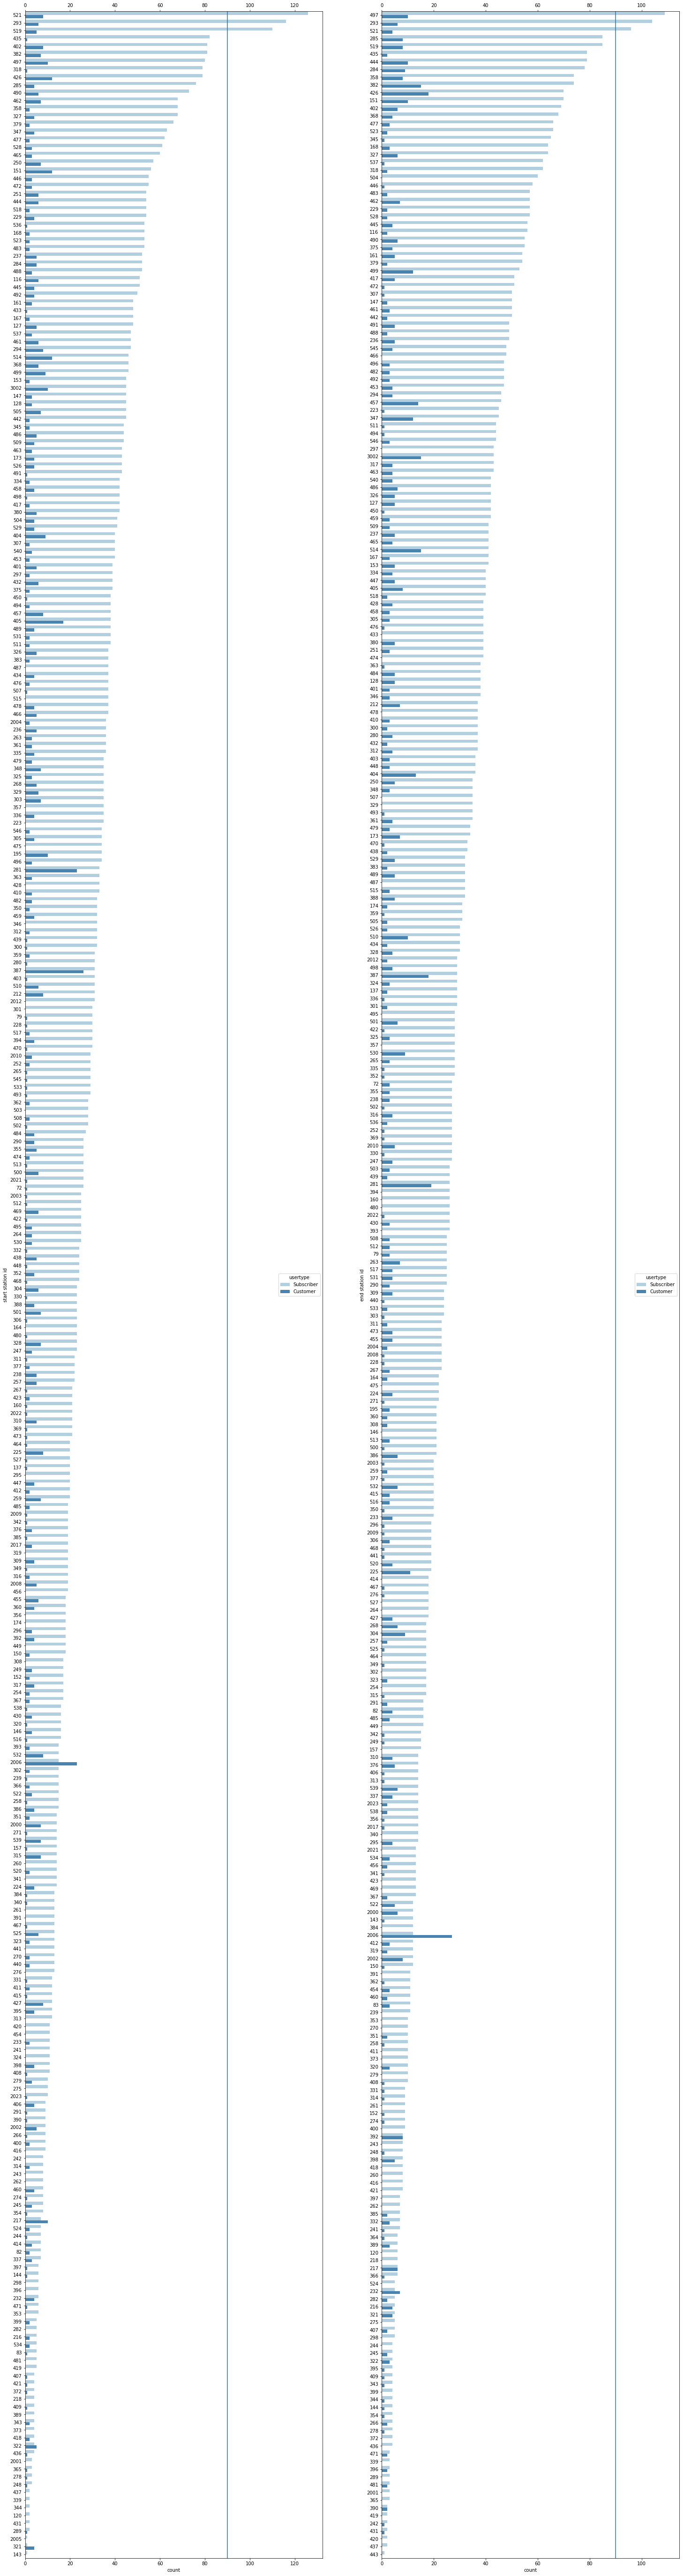

In [ ]:
plt.figure(figsize=[25, 100])
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

plt.subplot(1,2,1)
col = 'start station id'
# start_station_order = trip['start station id'][''].value_counts().index
start_station_order = trip[trip['usertype']=='Subscriber']['start station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=start_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.subplot(1,2,2)
col = 'end station id'
end_station_order = trip[trip['usertype']=='Subscriber']['end station id'].value_counts().index
# end_station_order = trip['end station id'].value_counts().index
sb.countplot(data=trip, y=col, hue = 'usertype', order=end_station_order, palette = 'Blues');
plt.ylabel(col)
plt.xlabel("count")
plt.axvline(90)

plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

Stations having higher Subsriber traffic does not have higher customer traffic. Subscriber traffic and Customer traffic are independent of each other.Some stations even have zero traffic.Analysing these two plots on same y scale can give a better understanding of overall traffic for a particular station.todo

In [ ]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='month_of_year', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [ ]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='day_of_week', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [ ]:
# log_bin_size = 0.05
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='time_of_day', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

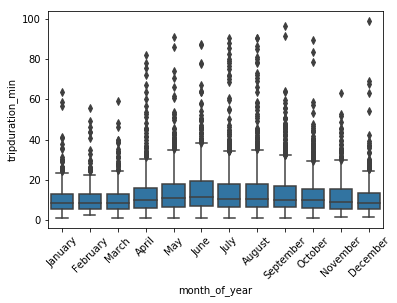

In [ ]:
# 'start station id','end station id', 'usertype','time_of_day', 'day_of_week', 'month_of_year', 'tripduration_min'

sb.boxplot(data=trip, x='month_of_year', y='tripduration_min', color=base_color)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

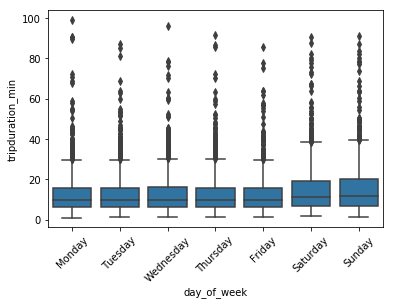

In [ ]:
# 'start station id','end station id', 'usertype','time_of_day', 'day_of_week', 'month_of_year', 'tripduration_min'

sb.boxplot(data=trip, x='day_of_week', y='tripduration_min', color=base_color)
plt.xticks(rotation=45)

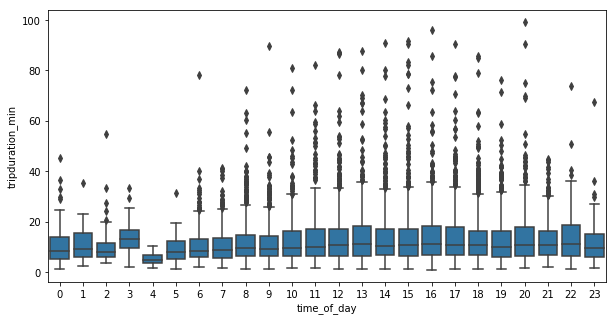

In [ ]:
# 'start station id','end station id', 'usertype','time_of_day', 'day_of_week', 'month_of_year', 'tripduration_min'
plt.figure(figsize=[10,5])
sb.boxplot(data=trip, x='time_of_day', y='tripduration_min', color=base_color)

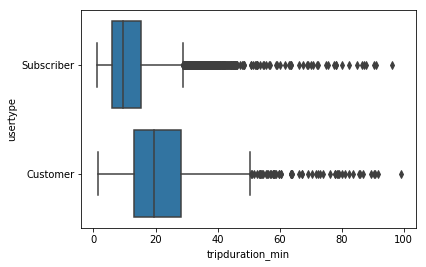

In [ ]:
sb.boxplot(data=trip, y='usertype', x='tripduration_min', color=base_color)

In [ ]:
# log_bin_size = 0.05
# # plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
# g=sb.FacetGrid(data=trip, col='time_of_day', col_wrap=4, sharey=True)
# g.map(plt.hist,'tripduration_min',bins=bins);
# # g.map(sb.countplot,'tripduration_min');
# # plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')
trip.columns

Index(['start station id', 'end station id', 'usertype', 'time_of_day',
       'day_of_week', 'month_of_year', 'tripduration_min',
       'start station name', 'end station name', 'starttime'],
      dtype='object')

C:\Users\manju\Anaconda3_4Feb19\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


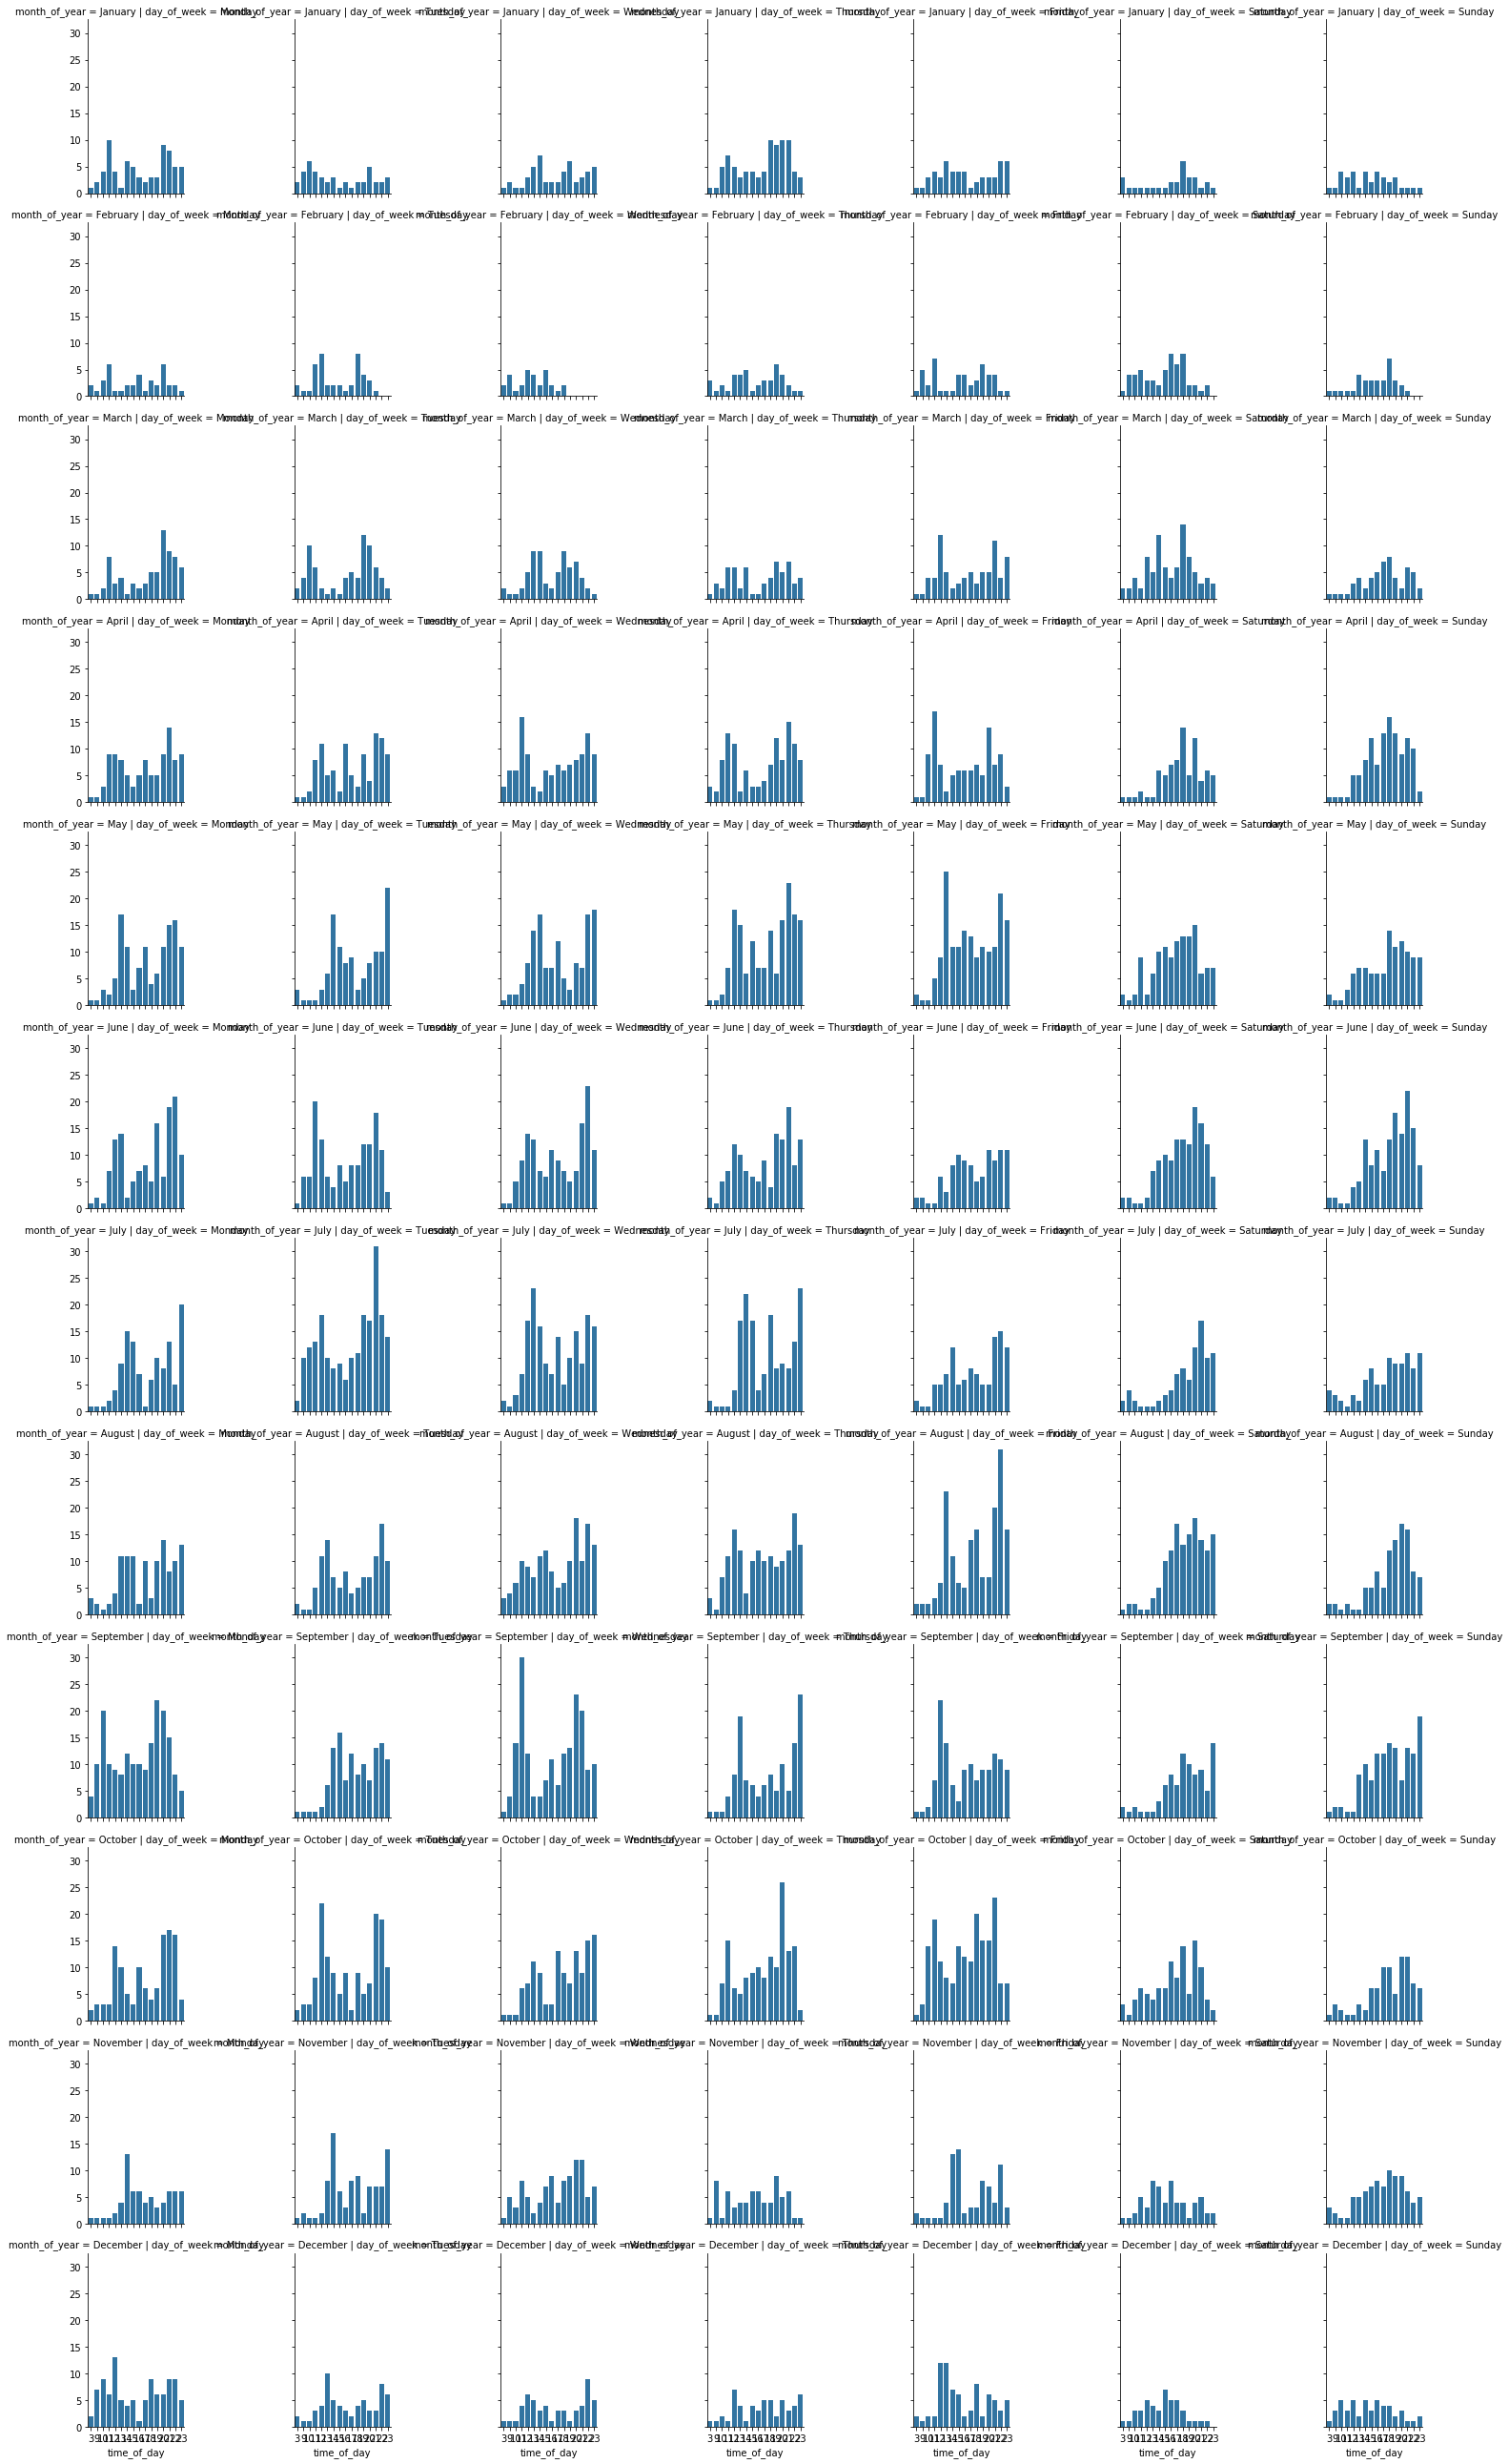

In [ ]:
log_bin_size = 0.05
# plt.figure(figsize=[])
# bins = 10**np.arange(0, np.log10(trip['tripduration_min'].max())+log_bin_size, log_bin_size)
g=sb.FacetGrid(data=trip, row='month_of_year',col='day_of_week', sharey=True)
g.map(sb.countplot,'time_of_day');
# g.map(sb.countplot,'tripduration_min');
# plt.hist(data=trip, x='tripduration_min', bins=bins)
# plt.xscale('log')
# x_ticks = [1, 2, 5,10,20,50,100]
# plt.xticks(x_ticks, x_ticks)
# plt.xlabel('trip duration (min)')

In [ ]:
# sb.distplot(trip['tripduration_min'])

Trip duration Vs Month -  Trip duration is longer for months from April to October. 

Trip duration Vs Day of Week - Trip duration is longer on Saturday and Sundays. univariate analysis, less number of trips were taken on Saturday Sunday. Combining the two analysis, more number of short trips are taken on weekdays, and more number of long trips are taken on Weekends

Trip duration Vs Time of Day - Surprisingly Trip duration is maximum at 3 hours and plunges to minimum at 4 hours. This is an area to be investigated.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
# g = sb.FacetGrid(data = trip, col = 'month_of_year', col_wrap = 4, size = 3)# xlim = [cuberoot_trans(.18), cuberoot_trans(3.5)]
# g.map(sb.hist2dgrid, 'time_of_day', 'tripduration_min', color = 'inferno_r')
# # g.set_xlabels('Carat')
# # g.set_ylabels('Price ($)')

trip.groupby('starttime').plot()

C:\Users\manju\Anaconda3_4Feb19\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [ ]:
trip.columns

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!